# Data Prep and Proprocessing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings

import transaction_risk_profiler
from transaction_risk_profiler.configs import settings

matplotlib.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', None)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load and Extract Data

In [3]:
df = pd.read_json(f'{settings.PROJECT_DIRECTORY}/{settings.DATASET_DIRECTORY}/transactions_train.json')

In [4]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
3,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA
4,premium,1297909800,28,5,US,USD,1.0,<p> </p>\r\n<p> </p>\r\n<p> </p>,naboe.org,1294425018,1297477800,1.294425e+09,1297468800,0,832.64,0,1.0,1,y,Fridays at Four Frederick 2011-02-11,36,12,3,1180179,"<div id=""organizer_display"">\r\n<p>Fridays at ...",0.0,NABOE Business Owner Networking,0.0,,ACH,"[{'name': '', 'created': '2011-01-12 01:12:34'...",35.0,35,1,"[{'event_id': 1180179, 'cost': 22.63, 'availab...",706,1233437951,3,6N East St,US,39.414270,-77.405089,Danielle's Restaurant,MD


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10036 entries, 0 to 10035
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           10036 non-null  object 
 1   approx_payout_date  10036 non-null  int64  
 2   body_length         10036 non-null  int64  
 3   channels            10036 non-null  int64  
 4   country             9982 non-null   object 
 5   currency            10036 non-null  object 
 6   delivery_method     10023 non-null  float64
 7   description         10036 non-null  object 
 8   email_domain        10036 non-null  object 
 9   event_created       10036 non-null  int64  
 10  event_end           10036 non-null  int64  
 11  event_published     9957 non-null   float64
 12  event_start         10036 non-null  int64  
 13  fb_published        10036 non-null  int64  
 14  gts                 10036 non-null  float64
 15  has_analytics       10036 non-null  int64  
 16  has_heade

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
approx_payout_date,10036.0,1.350988e+09,2.404584e+07,1.173074e+09,1.334531e+09,1.355870e+09,1.370636e+09,1.523488e+09
body_length,10036.0,3.711008e+03,5.823038e+03,0.000000e+00,7.547500e+02,2.010000e+03,4.272250e+03,6.553500e+04
channels,10036.0,6.211937e+00,3.870142e+00,0.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.300000e+01
delivery_method,10023.0,4.407862e-01,5.911783e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
event_created,10036.0,1.345827e+09,2.405512e+07,1.171223e+09,1.329837e+09,1.351039e+09,1.365204e+09,1.382012e+09
event_end,10036.0,1.350556e+09,2.404583e+07,1.172642e+09,1.334099e+09,1.355438e+09,1.370204e+09,1.523056e+09
event_published,9957.0,1.341185e+09,8.522701e+07,0.000000e+00,1.329765e+09,1.351108e+09,1.365444e+09,1.381608e+09
event_start,10036.0,1.350248e+09,2.397526e+07,1.172633e+09,1.333686e+09,1.355026e+09,1.369966e+09,1.418850e+09
fb_published,10036.0,1.300319e-01,3.363553e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
gts,10036.0,2.577367e+03,9.934350e+03,0.000000e+00,1.176650e+02,4.381050e+02,1.600000e+03,3.062939e+05


###  Initially looks like there are some datetime features, so convert those to datetime

In [7]:
datetime_features=[
    "approx_payout_date",
    "event_created",
    "event_end",
    "event_published",
    "event_start",
    "user_created",
]

df = pd.read_json(f'{settings.PROJECT_DIRECTORY}/{settings.DATASET_DIRECTORY}/transactions_train.json', convert_dates=datetime_features, date_unit="s")


In [8]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,2010-02-13 12:00:00,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,2010-01-06 01:01:46,2010-02-08 12:00:00,1.263110e+09,2010-02-08 02:00:00,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,2009-11-30 20:45:50,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,2011-02-03 08:00:00,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,2010-12-31 21:57:50,2011-01-29 08:00:00,1.293833e+09,2011-01-28 23:00:00,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,2010-08-04 17:26:16,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,2014-01-06 00:00:00,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,2013-02-12 15:06:10,2014-01-01 00:00:00,1.360683e+09,2013-02-12 21:00:00,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,2010-09-07 14:35:02,3,,None,NaN,NaN,None,None
3,premium,2011-02-17 00:00:00,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,2010-12-10 15:24:26,2011-02-12 00:00:00,1.291995e+09,2011-02-11 16:00:00,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,2010-11-05 19:07:45,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA
4,premium,2011-02-17 02:30:00,28,5,US,USD,1.0,<p> </p>\r\n<p> </p>\r\n<p> </p>,naboe.org,2011-01-07 18:30:18,2011-02-12 02:30:00,1.294425e+09,2011-02-12 00:00:00,0,832.64,0,1.0,1,y,Fridays at Four Frederick 2011-02-11,36,12,3,1180179,"<div id=""organizer_display"">\r\n<p>Fridays at ...",0.0,NABOE Business Owner Networking,0.0,,ACH,"[{'name': '', 'created': '2011-01-12 01:12:34'...",35.0,35,1,"[{'event_id': 1180179, 'cost': 22.63, 'availab...",706,2009-01-31 21:39:11,3,6N East St,US,39.414270,-77.405089,Danielle's Restaurant,MD


In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
approx_payout_date,10036,2012-10-23 10:23:43.062973440,2007-03-05 06:00:00,2012-04-15 23:00:00,2012-12-18 22:30:00,2013-06-07 20:15:00,2018-04-11 23:00:00,NaN
body_length,10036.0,3711.00847,0.0,754.75,2010.0,4272.25,65535.0,5823.037962
channels,10036.0,6.211937,0.0,5.0,6.0,8.0,13.0,3.870142
delivery_method,10023.0,0.440786,0.0,0.0,0.0,1.0,3.0,0.591178
event_created,10036,2012-08-24 16:43:03.519330304,2007-02-11 19:36:10,2012-02-21 15:02:47,2012-10-24 00:43:18.500000,2013-04-05 23:15:15,2013-10-17 12:09:36,NaN
event_end,10036,2012-10-18 10:23:54.182941440,2007-02-28 06:00:00,2012-04-10 23:00:00,2012-12-13 22:30:00,2013-06-02 20:15:00,2018-04-06 23:00:00,NaN
event_published,9957.0,1341185430.15115,0.0,1329765385.0,1351107642.0,1365444099.0,1381608321.0,85227005.169491
event_start,10036,2012-10-14 21:00:09.505779200,2007-02-28 03:30:00,2012-04-06 04:22:30,2012-12-09 04:00:00,2013-05-31 02:07:30,2014-12-17 21:00:00,NaN
fb_published,10036.0,0.130032,0.0,0.0,0.0,0.0,1.0,0.336355
gts,10036.0,2577.366609,0.0,117.665,438.105,1600.0,306293.93,9934.350164


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10036 entries, 0 to 10035
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   acct_type           10036 non-null  object        
 1   approx_payout_date  10036 non-null  datetime64[ns]
 2   body_length         10036 non-null  int64         
 3   channels            10036 non-null  int64         
 4   country             9982 non-null   object        
 5   currency            10036 non-null  object        
 6   delivery_method     10023 non-null  float64       
 7   description         10036 non-null  object        
 8   email_domain        10036 non-null  object        
 9   event_created       10036 non-null  datetime64[ns]
 10  event_end           10036 non-null  datetime64[ns]
 11  event_published     9957 non-null   float64       
 12  event_start         10036 non-null  datetime64[ns]
 13  fb_published        10036 non-null  int64         


## Initial Impressions

- Looks like there are a number of text features
- ticket_types and previous_payouts contain lists, these can be converted to subarrays
- venue latitude and venue longitude are geospatial features
- listed is likely a binary feature with 'y' and 'n' corresponding to yes and no, we can encode these as binary
- fb_published, has_analytics, has_header, has_logo, show_map have min of 0 and max of 1, we can encode these as binary variables
- Some of the text features can be encoded as categorical
- org_facebook and org_twitter are likely the length of their @usernames, we can bin these and see if there is a recognizable pattern
- gts stands for gross ticket sales
- previously identified datetime features are missing values, if they missing values can be encoded as binary features
- acct_type is our target variable
- description is most definitely a text feature, will ignore for now
- object_id is a row id

In [11]:
geospatial_features = ["venue_latitude", "venue_longitude"]
initial_text_features = ["description", "name", "venue_name", "venue_state", "email_domain", "org_desc", "org_name", "payee_name", "venue_address"]  # we will include further text features, but some can probably encoded as categorical variables so we will keep them for now
id_columns = ["object_id"]
list_variables = ["ticket_types", "previous_payouts"]
categorical_numerical_ignore = geospatial_features + datetime_features + initial_text_features + id_columns + list_variables + ["acct_type", "target"]

### Initial Fill In NA
Base on the results of using value counts, determine an initial appropriate value to fill in NAN's

In [12]:
missing_values = ["country", "delivery_method", "has_header", "org_facebook", "org_twitter", "sale_duration"]
for col in missing_values:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("\n")

Column: country
country
US    6444
GB    1476
CA     885
AU     523
       217
      ... 
PT       1
KE       1
NI       1
PS       1
TR       1
Name: count, Length: 66, dtype: int64


Column: delivery_method
delivery_method
0.0    5949
1.0    3902
3.0     172
NaN      13
Name: count, dtype: int64


Column: has_header
has_header
0.0    5007
NaN    3775
1.0    1254
Name: count, dtype: int64


Column: org_facebook
org_facebook
0.0     5654
12.0     350
16.0     287
14.0     285
13.0     278
        ... 
80.0       1
60.0       1
73.0       1
69.0       1
72.0       1
Name: count, Length: 81, dtype: int64


Column: org_twitter
org_twitter
0.0     6377
15.0     575
14.0     466
12.0     430
13.0     419
11.0     372
10.0     311
16.0     255
9.0      239
8.0      222
7.0      134
6.0       79
NaN       44
5.0       43
2.0       24
4.0       23
17.0       6
23.0       6
3.0        5
18.0       3
21.0       2
20.0       1
Name: count, dtype: int64


Column: sale_duration
sale_duration
 1.0  

In [13]:
# missing_values = ["country", "delivery_method", "has_header", "org_facebook", "org_twitter", "sale_duration"]

# for country let's start with just using empty string
df["country"].fillna("", inplace=True)

# for sale_duration, there are negative values which don't make sense
# Make a column right away for that
df["sale_duration_neg"] = df["sale_duration"] < 0.0

# delivery method has three values and NaN, for now use 4.0, will investigate further
df["delivery_method"].fillna(4.0, inplace=True)


MISSING_VALS_FLOAT = ["has_header", "org_facebook", "org_twitter", "sale_duration"]

for col in MISSING_VALS_FLOAT:
    df[col].fillna(0.0, inplace=True)
    # df[f"{col}_nan"]



## Target our target value is acct_type
Since we are interested in identifying potentially fraudulent activity, we will predict on preimum/non-premium account types

In [14]:
df.acct_type.value_counts(dropna=False)

acct_type
premium             8656
fraudster_event      590
fraudster            315
spammer_limited      153
spammer_warn          96
tos_warn              64
spammer_noinvite      61
tos_lock              57
locked                38
fraudster_att          3
spammer_web            2
spammer                1
Name: count, dtype: int64

# Initial target encoding

In [15]:
df["target"] = df["acct_type"].apply(lambda x: int(x != "premium"))

# Visualizing Data Distributions

## Significance of Visualizing Data Distributions
Initiating any data analysis or predictive modeling project necessitates a comprehensive understanding of how individual variables within the dataset are dispersed. Employing visualization techniques to depict these distributions serves as an invaluable tool, offering immediate insights that are crucial for guiding subsequent phases of analysis.

## Key Questions Answered Through Visualization
Visual depictions of data distributions are instrumental in swiftly addressing a multitude of pivotal questions that are foundational to the analytic process:

- Extent of Observational Data: What is the minimum and maximum range that the dataset spans?
- Central Tendency Measures: Where does the bulk of the data concentrate, as indicated by statistical measures such as the mean, median, or mode?
- Skewness Assessment: Is the dataset predominantly skewed towards higher or lower values?
- Evidence of Multiple Peaks: Does the data reveal bimodal or multimodal tendencies, suggesting multiple underlying processes or groups?
- Identification of Outliers: Are there any extreme values that deviate significantly from the majority of observations?

## Subset-Specific Insights
Moreover, it's imperative to examine whether these key characteristics persist or vary when the data is partitioned based on other influencing factors or variables. For instance, does the distribution of a variable like income differ when categorized by variables such as age, gender, or geographic location?

# Categorical and Numerical Variables

Explore what variables we can probably encode as categorical or binary variables

- We will use Counter to see how many unique values each column has
- Given that we know which columns are datetime, we can skip these and the geo_spatial features
- We can plot the features that have unique values <= 20 as bar charts to further investigate
- If > 20, let's bin, number of bins will be set the sqrt of num unique, if num unique is greater than 50

Charting Column 2: body_length


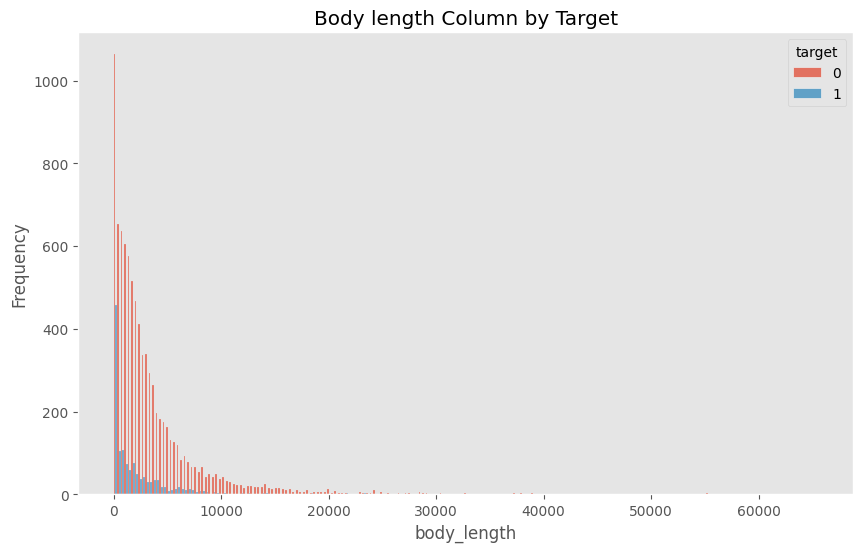

Charting Column 3: channels


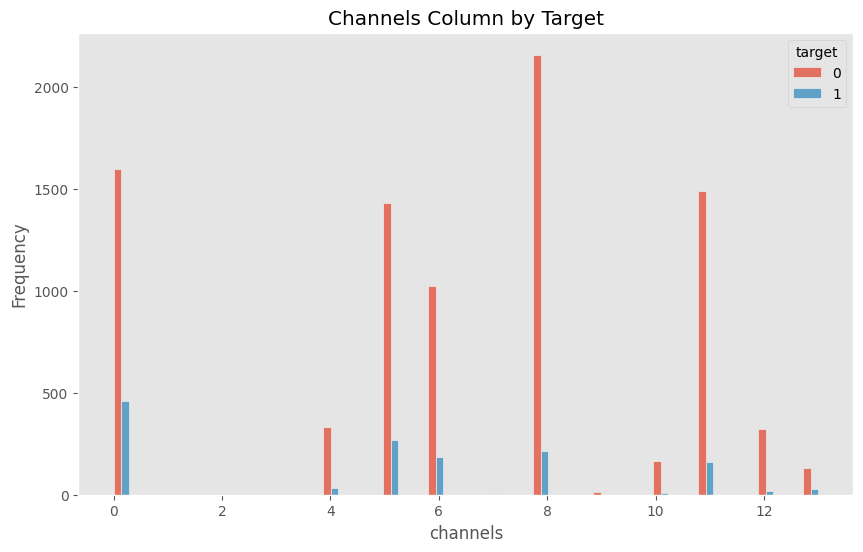

Charting Column 4: country


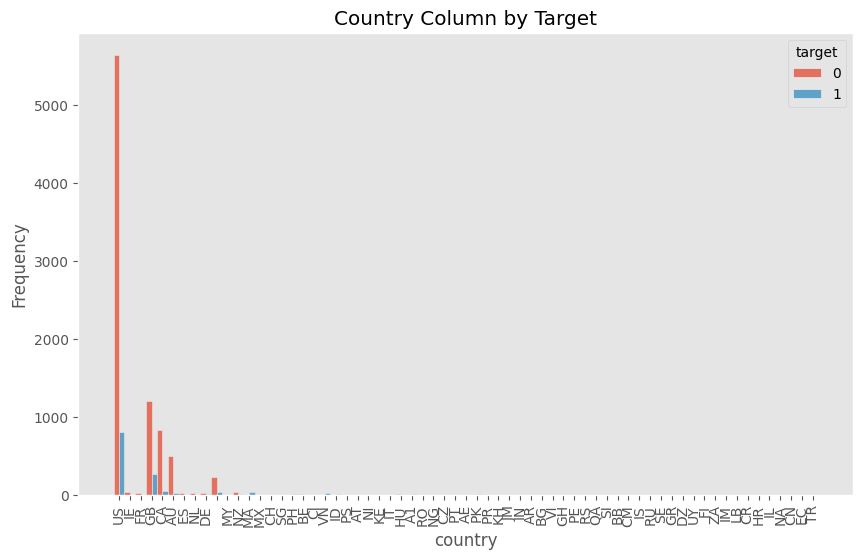

Charting Column 5: currency


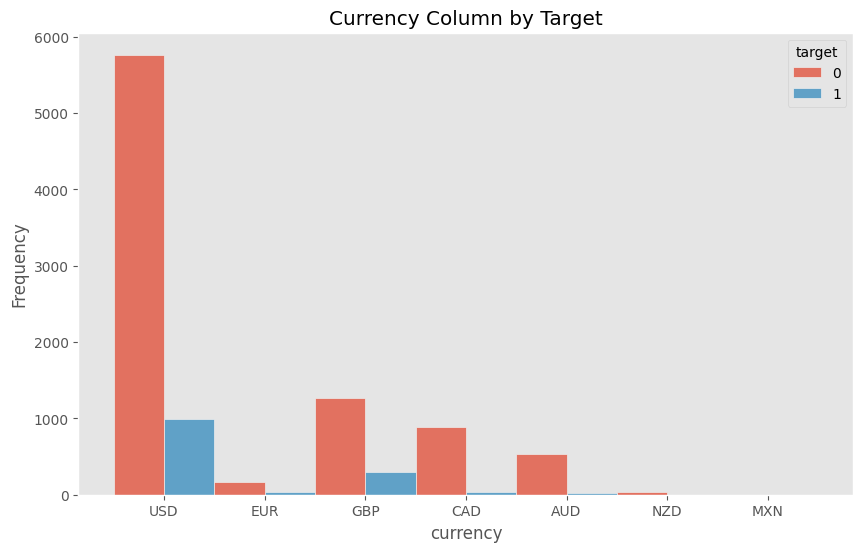

Charting Column 6: delivery_method


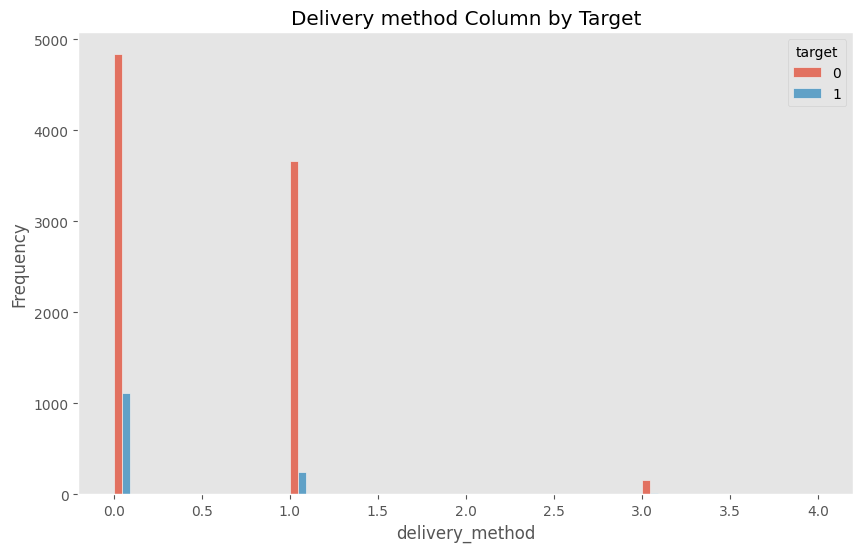

Charting Column 13: fb_published


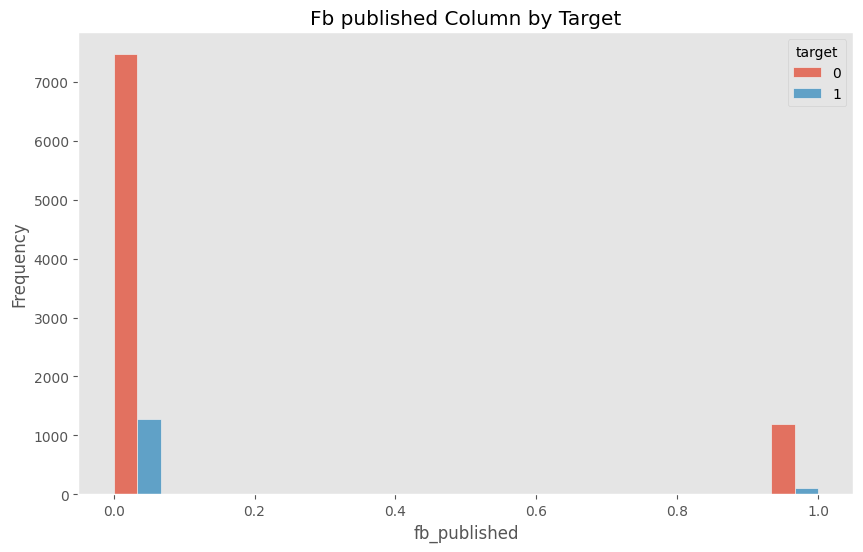

Charting Column 14: gts


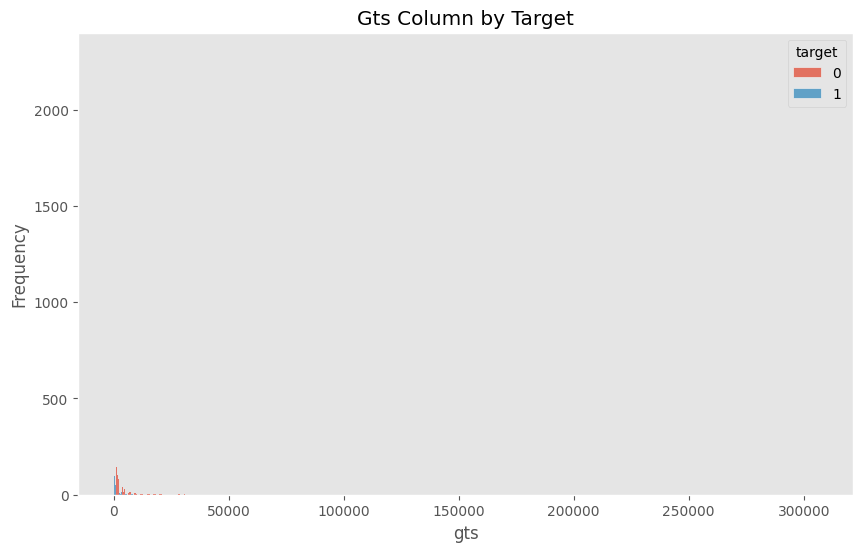

Charting Column 15: has_analytics


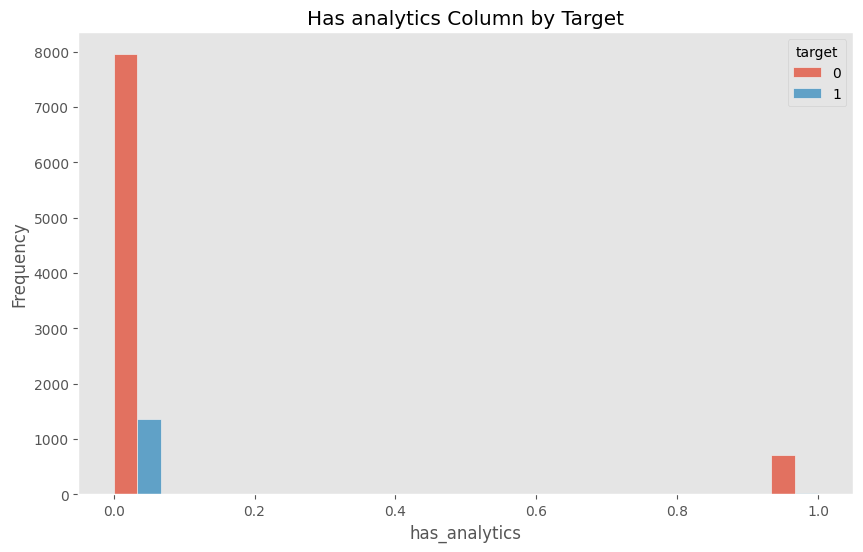

Charting Column 16: has_header


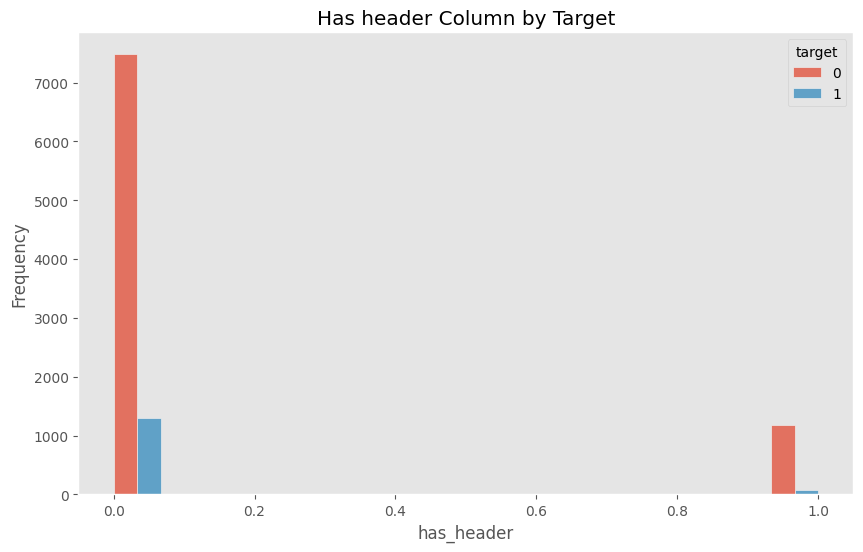

Charting Column 17: has_logo


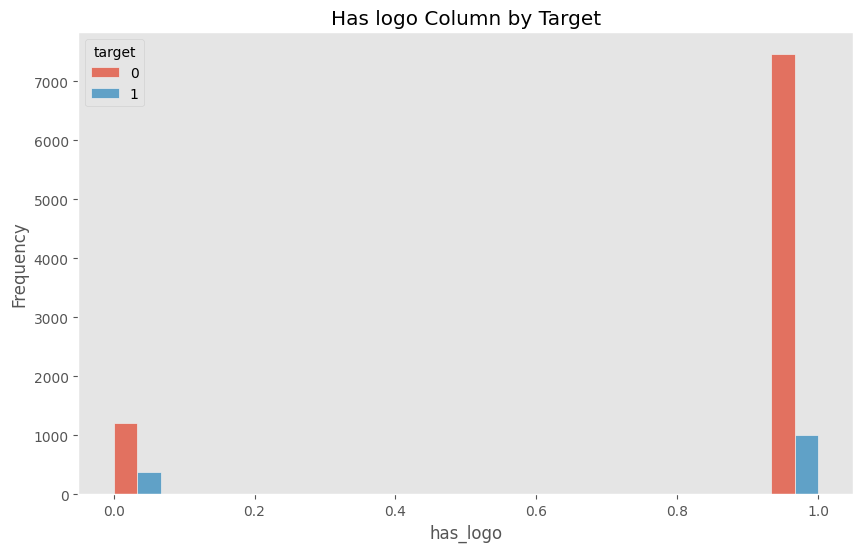

Charting Column 18: listed


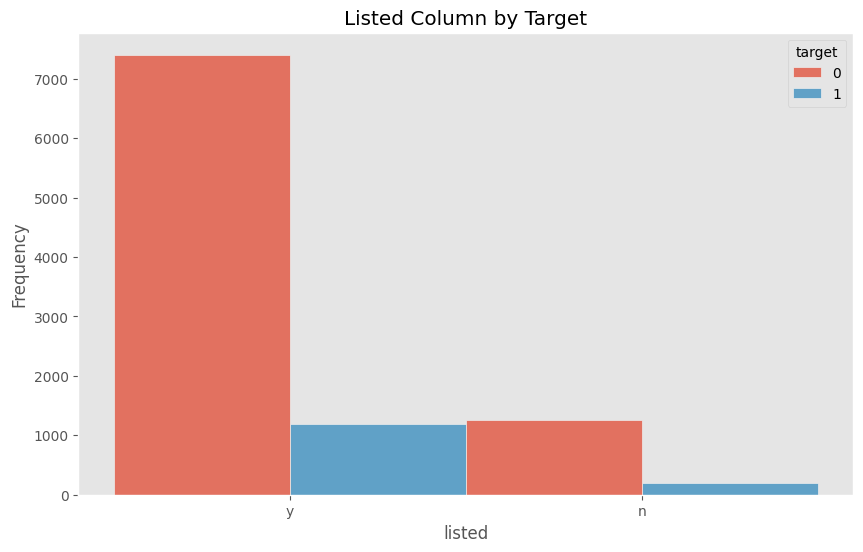

Charting Column 20: name_length


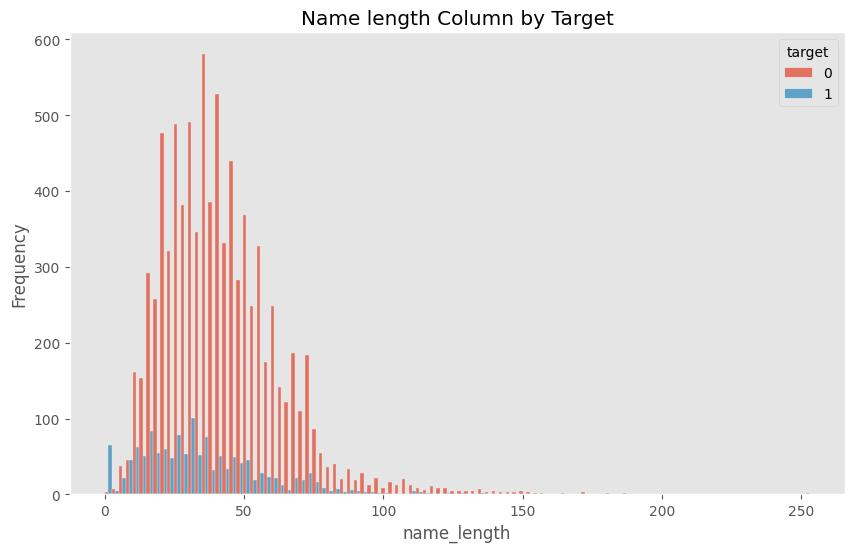

Charting Column 21: num_order


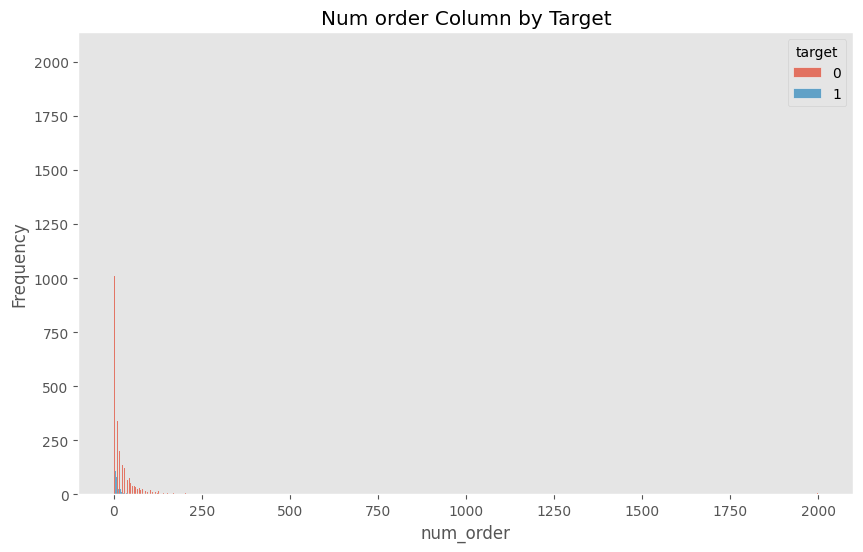

Charting Column 22: num_payouts


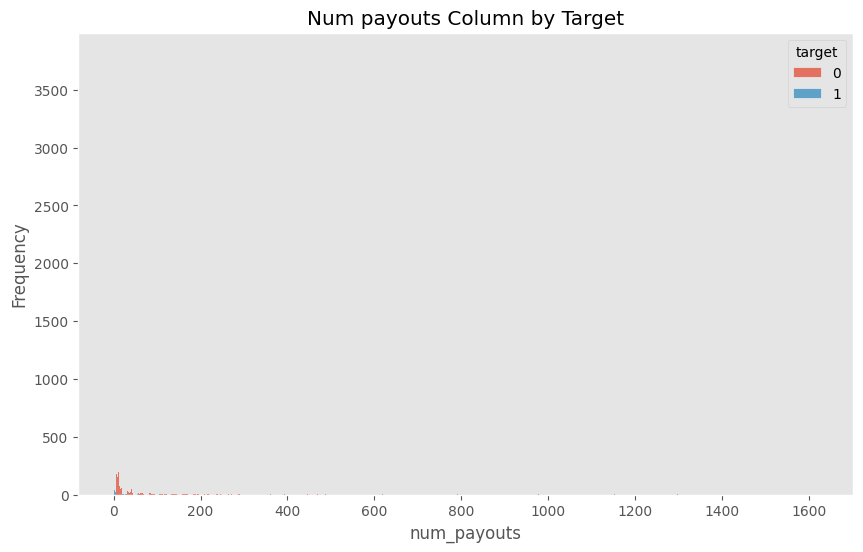

Charting Column 25: org_facebook


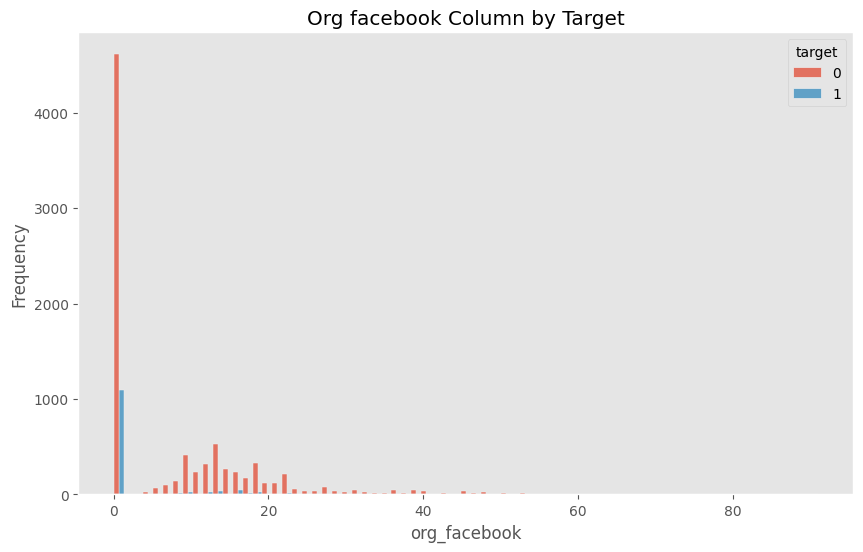

Charting Column 27: org_twitter


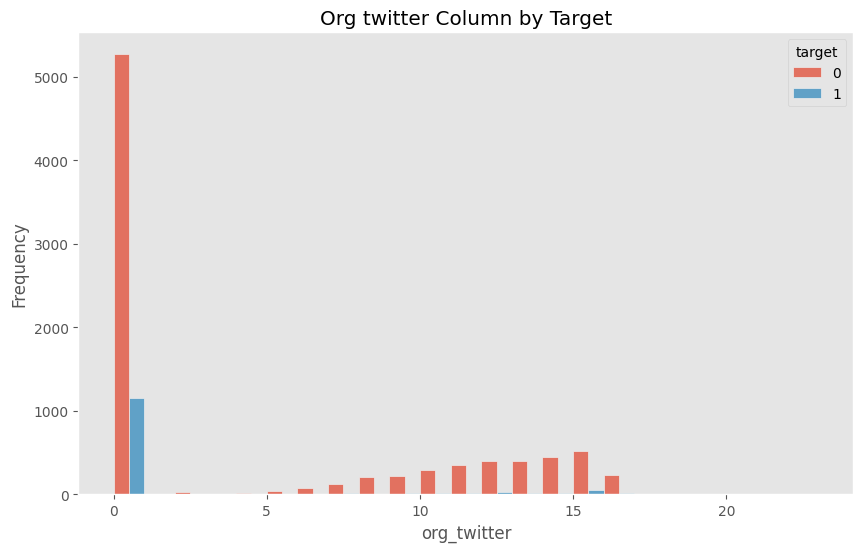

Charting Column 29: payout_type


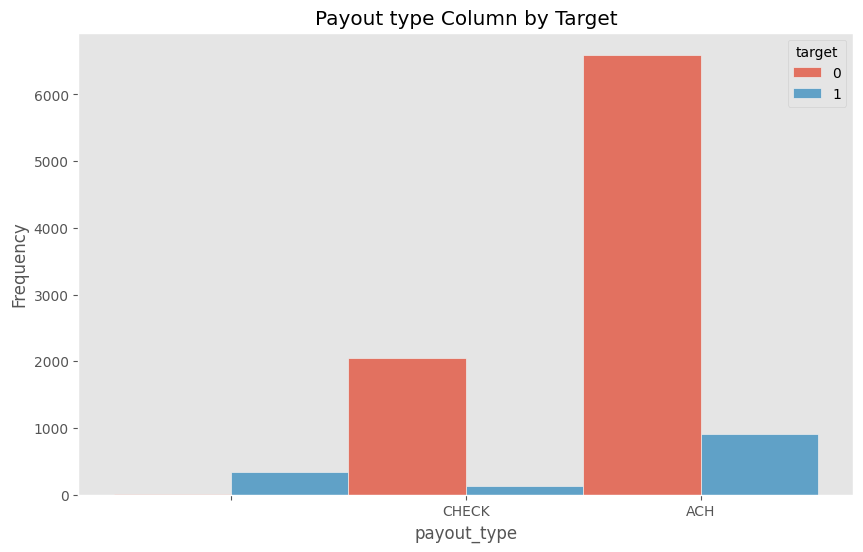

Charting Column 31: sale_duration


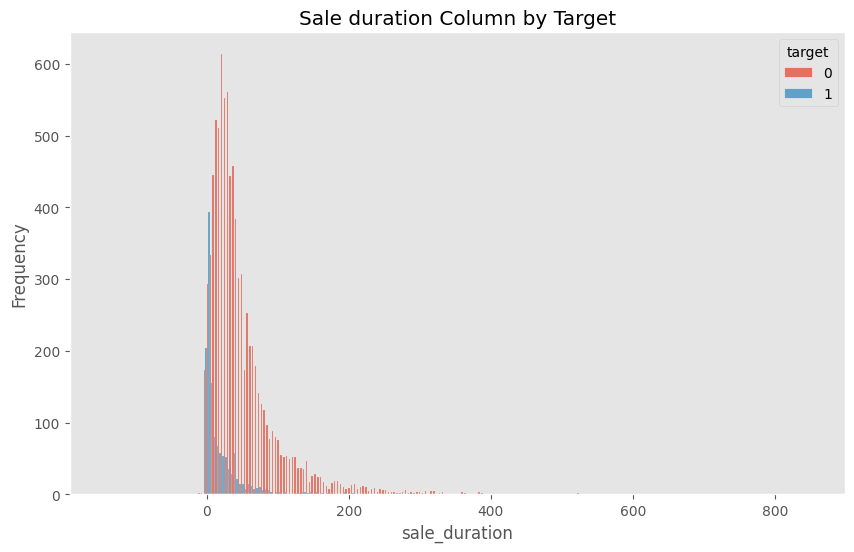

Charting Column 32: sale_duration2


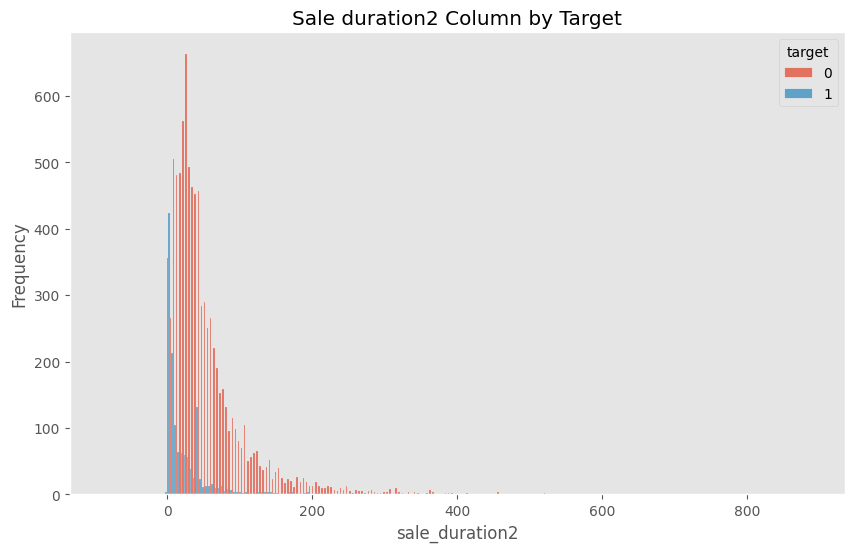

Charting Column 33: show_map


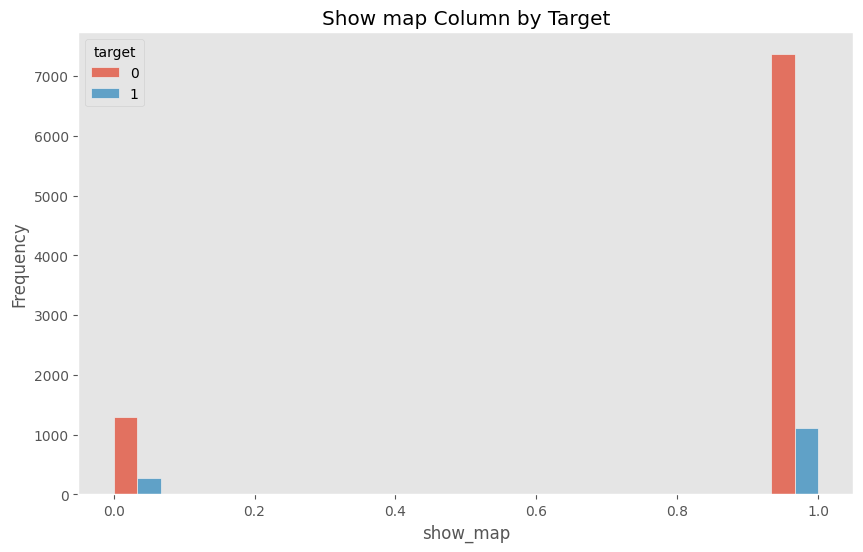

Charting Column 35: user_age


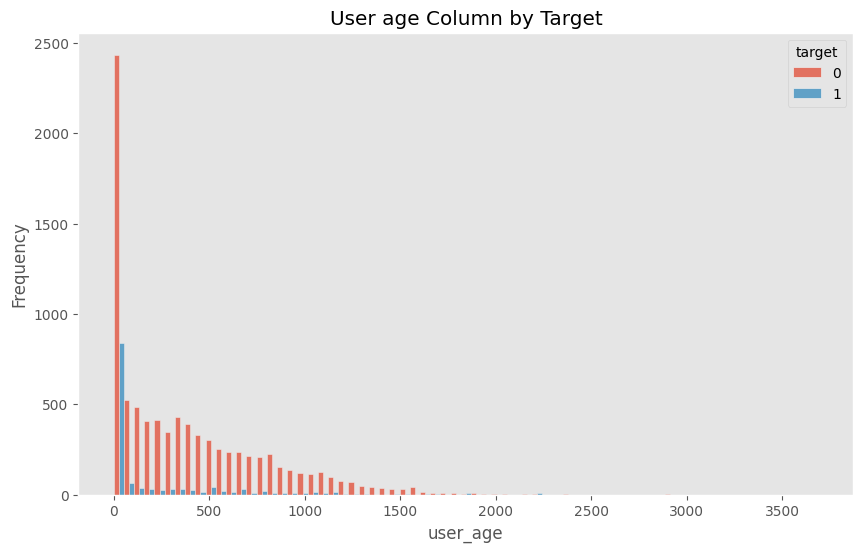

Charting Column 37: user_type


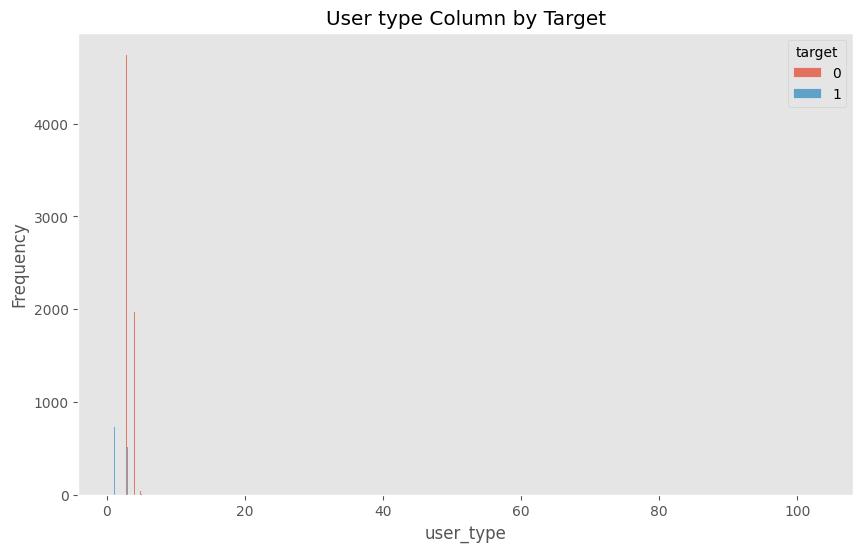

Charting Column 39: venue_country


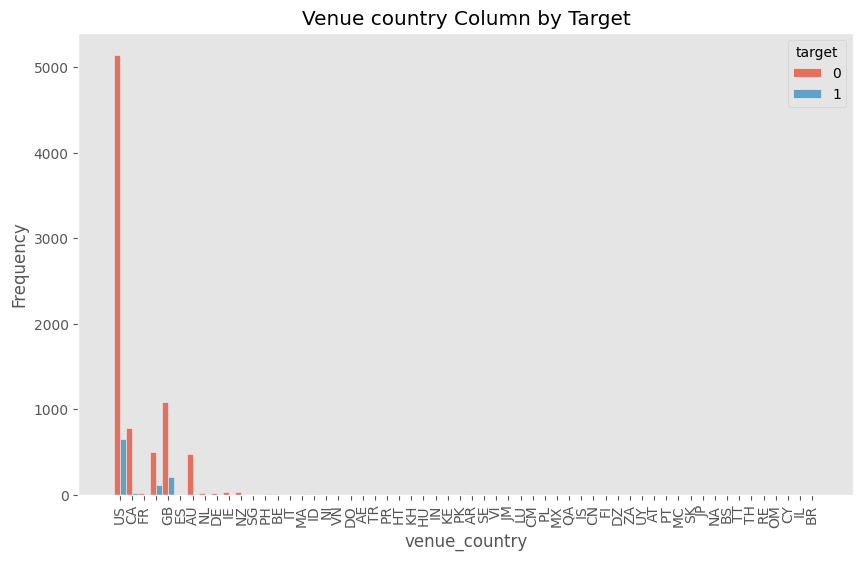

Charting Column 44: sale_duration_neg


/Users/rodrigogonzalez/workspace/transaction-risk-profiler/.venv/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Users/rodrigogonzalez/workspace/transaction-risk-profiler/.venv/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


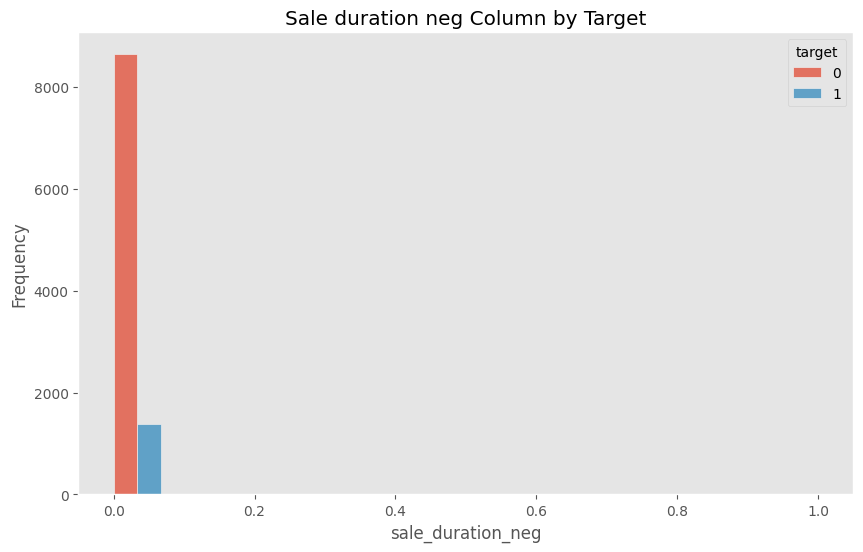

In [16]:

for i, col in enumerate(df.columns):
    if col not in categorical_numerical_ignore:  #  + ["num_payouts", "num_order"]
        print(f"Charting Column {i}: {col}")
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10,6))

        # Create the displot on the specific Axes
        if df[col].value_counts(dropna=False).shape[0] > 20 and isinstance(df[col], (int, float)):
            bins = np.linspace(min(df[col]), max(df[col]), 20)
            sns.histplot(df, x=col, hue="target", multiple="dodge", ax=ax, bins=bins)
        else:
            sns.histplot(df, x=col, hue="target", multiple="dodge", ax=ax)
        
        # Use the set_title method on the Axes object
        ax.set_title(f"{' '.join(col.capitalize().split('_'))} Column by Target")
        ax.set_ylabel("Frequency")
        ax.set_xlabel(col)
        if col in ["country", "venue_country"]:
            plt.xticks(rotation=90)
        plt.grid()
        plt.show()

        

In [17]:
# Exploratory Data Analysis and Preliminary Feature Engineering

fraud_list = ['fraudster', 'fraudster_event', 'fraudster_att']
spammer_list = ['spammer_limited', 'spammer_noinvite', 'spammer_web', 'spammer', 'spammer_warn']
tos_list = ['tos_warn', 'tos_lock']
premiumlist = ['premium']
locked_list = ['locked']
suspicious_list= spammer_list+tos_list+locked_list
fraud_list=fraud_list+suspicious_list

# Classify records as fraud or not based on the 'acct_type' column.
# A new boolean column 'fraud' is created where True indicates fraud and False indicates not fraud.
df['fraud'] = df.acct_type.isin(fraud_list)

# Convert Unix timestamps to human-readable datetime format for various event-related columns.
# Separate the date and time into new columns for further analysis.

# Convert 'approx_payout_date' and create separate columns for date and time.
df.approx_payout_date = pd.to_datetime(df.approx_payout_date, unit='s')
df['approx_payout_date_date'] = df.approx_payout_date.dt.date
df['approx_payout_date_time'] = df.approx_payout_date.dt.time

# Convert 'event_created' and create separate columns for date and time.
df.event_created = pd.to_datetime(df.event_created, unit='s')
df['event_created_date'] = df.event_created.dt.date
df['event_created_time'] = df.event_created.dt.time

# Convert 'event_published' and create separate columns for date and time.
df.event_published = pd.to_datetime(df.event_published, unit='s')
df['event_publish_date'] = df.event_published.dt.date
df['event_publish_time'] = df.event_published.dt.time

# Convert 'event_start' and create separate columns for date and time.
df.event_start = pd.to_datetime(df.event_start, unit='s')
df['event_start_date'] = df.event_start.dt.date
df['event_start_time'] = df.event_start.dt.time

# Convert 'event_end' and create separate columns for date and time.
df.event_end = pd.to_datetime(df.event_end, unit='s')
df['event_end_date'] = df.event_end.dt.date
df['event_end_time'] = df.event_end.dt.time

# Calculate event duration in hours.
df['event_duration_h'] = (df.event_end - df.event_start).astype('timedelta64[s]')

# Convert 'user_created' and create separate columns for date and time.
df.user_created = pd.to_datetime(df.user_created, unit='s')
df['user_create_date'] = df.user_created.dt.date
df['user_create_time'] = df.user_created.dt.time

# Create boolean columns to indicate the presence of venue address, venue name, and payee name.
df['has_venue_address'] = df.venue_address != ''
df['has_venue_name'] = df.venue_name != ''
df['has_payee_name'] = df.payee_name != ''

# Fill missing values in 'has_header' column with 0.
df['has_header'].fillna(value=0, inplace=True)

df['has_payee_name'] = df.payee_name != ''
df['has_header_filled'] = df.has_header
df['has_header_filled'].fillna(value=2,inplace=True)

# "country": {f"{item}_country_count": lambda x: x.nunique()},
# "state": {f"{item}_state_count": lambda x: x.nunique()},

In [18]:
# Add new datetime features to list of datetime features
# additional_datetime_features = []
# for feat in datetime_features:
#     datetime_features.append(f"{feat}_date")
#     datetime_features.append(f"{feat}_time")

# datetime_features.extend(additional_datetime_features)

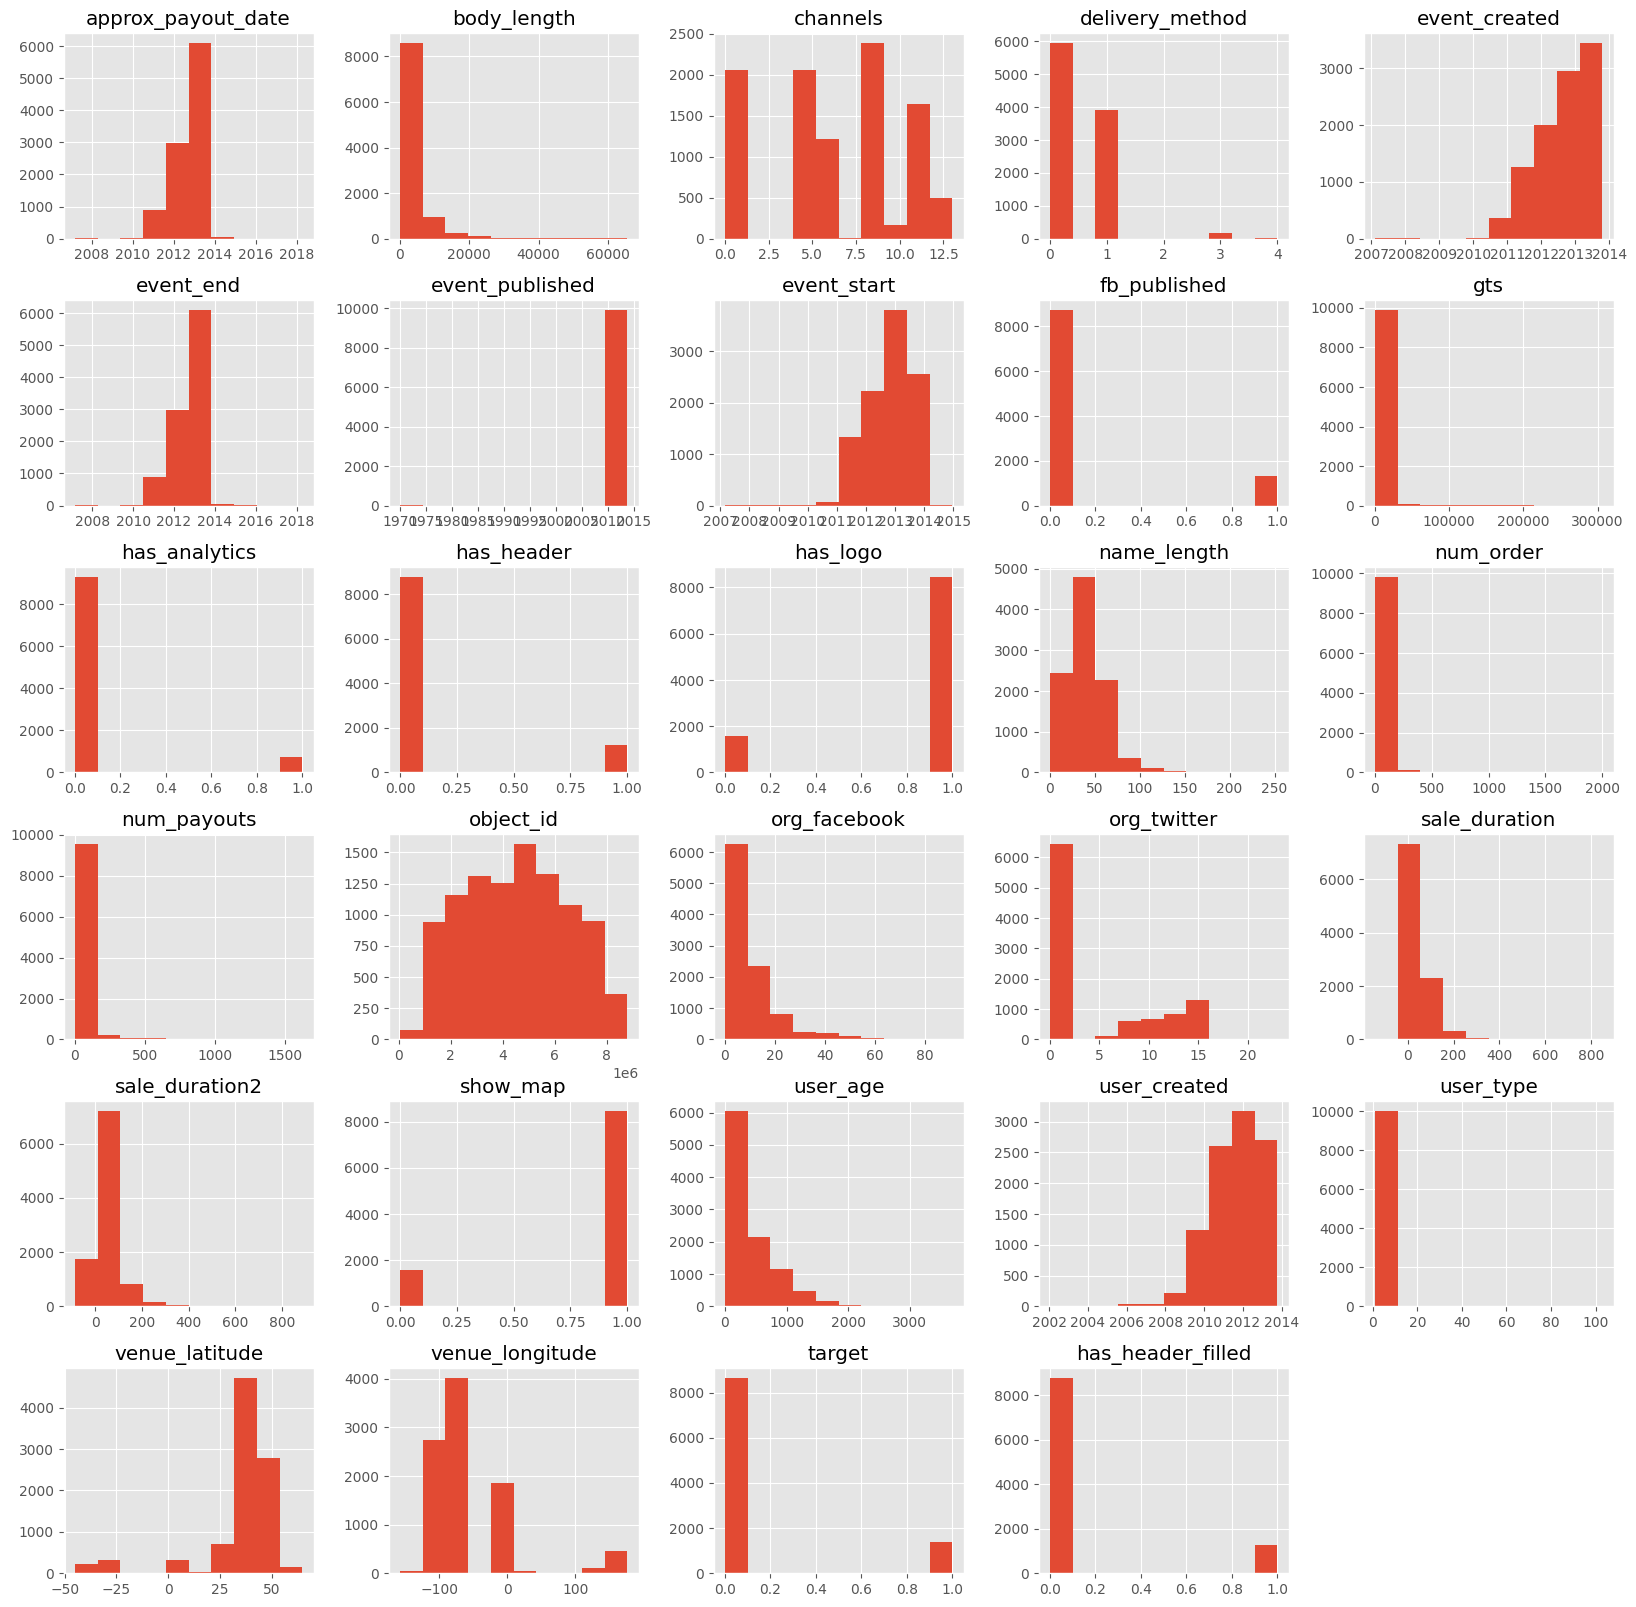

In [19]:
df.hist(figsize=(20,20))
plt.show()

In [20]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
approx_payout_date,10036,2012-10-23 10:23:43.062973440,2007-03-05 06:00:00,2012-04-15 23:00:00,2012-12-18 22:30:00,2013-06-07 20:15:00,2018-04-11 23:00:00,NaN
body_length,10036.0,3711.00847,0.0,754.75,2010.0,4272.25,65535.0,5823.037962
channels,10036.0,6.211937,0.0,5.0,6.0,8.0,13.0,3.870142
delivery_method,10036.0,0.445397,0.0,0.0,0.0,1.0,4.0,0.604507
event_created,10036,2012-08-24 16:43:03.519330304,2007-02-11 19:36:10,2012-02-21 15:02:47,2012-10-24 00:43:18.500000,2013-04-05 23:15:15,2013-10-17 12:09:36,NaN
event_end,10036,2012-10-18 10:23:54.182941440,2007-02-28 06:00:00,2012-04-10 23:00:00,2012-12-13 22:30:00,2013-06-02 20:15:00,2018-04-06 23:00:00,NaN
event_published,9957,2012-07-01 23:30:30.151149824,1970-01-01 00:00:00,2012-02-20 19:16:25,2012-10-24 19:40:42,2013-04-08 18:01:39,2013-10-12 20:05:21,NaN
event_start,10036,2012-10-14 21:00:09.505779200,2007-02-28 03:30:00,2012-04-06 04:22:30,2012-12-09 04:00:00,2013-05-31 02:07:30,2014-12-17 21:00:00,NaN
fb_published,10036.0,0.130032,0.0,0.0,0.0,0.0,1.0,0.336355
gts,10036.0,2577.366609,0.0,117.665,438.105,1600.0,306293.93,9934.350164


In [21]:
previous_payouts = df.previous_payouts.head(3).values
for payouts in previous_payouts:
    if payouts:
        for payout in payouts:
            print("\n")
            print(payout)



{'name': 'RUF', 'created': '2010-10-01 01:10:09', 'country': 'US', 'amount': 34389.38, 'state': 'GA', 'address': '1700 North Brown Road', 'uid': 5419068, 'event': 786869, 'zip_code': '30043'}


{'name': 'RUF', 'created': '2011-02-02 01:12:10', 'country': 'US', 'amount': 764.93, 'state': 'GA', 'address': '1700 North Brown Road', 'uid': 5419068, 'event': 786878, 'zip_code': '30043'}


{'name': 'RUF', 'created': '2011-03-15 01:30:42', 'country': 'US', 'amount': 17405.26, 'state': 'GA', 'address': '1700 North Brown Road', 'uid': 5419068, 'event': 1181203, 'zip_code': '30043'}


{'name': 'RUF', 'created': '2011-03-15 01:30:42', 'country': 'US', 'amount': 2224.16, 'state': 'GA', 'address': '1700 North Brown Road', 'uid': 5419068, 'event': 1293213, 'zip_code': '30043'}


{'name': 'RUF', 'created': '2011-04-01 01:30:31', 'country': 'US', 'amount': 5370.58, 'state': 'GA', 'address': '1700 North Brown Road', 'uid': 5419068, 'event': 1181203, 'zip_code': '30043'}


{'name': 'RUF', 'created': '2

# List Variables



In [22]:
# Lets first add columns for the rows with empty lists
df['ticket_types_empty'] = df['ticket_types'].apply(lambda x: 1 if not x else 0)
df['previous_payouts_empty'] = df['previous_payouts'].apply(lambda x: 1 if not x else 0)


In [23]:
ticket_types = df.ticket_types.head(10).values
for tickets in ticket_types:
    if tickets:
        for ticket in tickets:
            print("\n")
            print(ticket)



{'event_id': 527017, 'cost': 25.0, 'availability': 1, 'quantity_total': 800, 'quantity_sold': 0}


{'event_id': 527017, 'cost': 50.0, 'availability': 1, 'quantity_total': 100, 'quantity_sold': 0}


{'event_id': 527017, 'cost': 550.0, 'availability': 1, 'quantity_total': 20, 'quantity_sold': 0}


{'event_id': 786878, 'cost': 35.0, 'availability': 1, 'quantity_total': 50, 'quantity_sold': 22}


{'event_id': 786878, 'cost': 35.0, 'availability': 1, 'quantity_total': 50, 'quantity_sold': 3}


{'event_id': 885645, 'cost': 25.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 10}


{'event_id': 885645, 'cost': 15.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 23}


{'event_id': 885645, 'cost': 10.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 8}


{'event_id': 885645, 'cost': 5.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 12}


{'event_id': 885645, 'cost': 15.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 0}


{'

In [24]:
# Aggregate List Data
from transaction_risk_profiler.preprocessing.aggregations import get_payout_info
from transaction_risk_profiler.preprocessing.aggregations import get_ticket_info


# Step 1: Extract Payout and Ticket Information
payout_df = get_payout_info(df)
ticket_df = get_ticket_info(df)

payout_df.head(), ticket_df.head()

(   object_id                address    amount country              created  \
 0     786878  1700 North Brown Road  34389.38      US  2010-10-01 01:10:09   
 1     786878  1700 North Brown Road    764.93      US  2011-02-02 01:12:10   
 2     786878  1700 North Brown Road  17405.26      US  2011-03-15 01:30:42   
 3     786878  1700 North Brown Road   2224.16      US  2011-03-15 01:30:42   
 4     786878  1700 North Brown Road   5370.58      US  2011-04-01 01:30:31   
 
      event name state      uid zip_code  
 0   786869  RUF    GA  5419068    30043  
 1   786878  RUF    GA  5419068    30043  
 2  1181203  RUF    GA  5419068    30043  
 3  1293213  RUF    GA  5419068    30043  
 4  1181203  RUF    GA  5419068    30043  ,
    object_id  availability   cost  event_id  quantity_sold  quantity_total
 0     527017             1   25.0    527017              0             800
 1     527017             1   50.0    527017              0             100
 2     527017             1  550.0   

In [25]:
from transaction_risk_profiler.preprocessing.aggregations import create_agg_schema

# Step 2: Create Aggregation Schema
payout_agg_schema = create_agg_schema('user')
ticket_agg_schema = create_agg_schema('event')

payout_agg_schema, ticket_agg_schema;

In [26]:
from transaction_risk_profiler.preprocessing.aggregations import aggregate_data

# Step 3: Aggregate Data
agg_payout_df = aggregate_data(payout_df, 'object_id', payout_agg_schema)
agg_ticket_df = aggregate_data(ticket_df, 'object_id', ticket_agg_schema)

In [27]:
agg_payout_df.head()

,amount_sum,amount_min,amount_max,amount_mean,amount_count,amount_std,country_unique_count,state_unique_count,created_min,created_max
object_id,,,,,,,,,,
48129,1808.50,6.0,912.00,75.354167,24,188.505131,1,1,2011-06-16 01:11:28,2012-06-09 03:14:12
104008,1808.50,6.0,912.00,75.354167,24,188.505131,1,1,2011-06-16 01:11:28,2012-06-09 03:14:12
104016,1808.50,6.0,912.00,75.354167,24,188.505131,1,1,2011-06-16 01:11:28,2012-06-09 03:14:12
104017,1808.50,6.0,912.00,75.354167,24,188.505131,1,1,2011-06-16 01:11:28,2012-06-09 03:14:12
379603,67870.15,10426.0,31938.15,16967.537500,4,10218.092812,1,1,2010-01-23 01:10:07,2013-01-26 03:12:37


In [28]:
agg_ticket_df.head()

,quantity_sold_sum,quantity_sold_fraction_sold,cost_min,cost_median,cost_max,cost_mean,cost_std,cost_count,cost_weighted_cost,event_id_unique_count
object_id,,,,,,,,,,
48129,21.0,0.0,4.0,4.5,5.0,4.5,0.707107,2.0,0.0,1.0
48130,0.0,0.0,4.0,4.5,5.0,4.5,0.707107,2.0,0.0,1.0
104008,14.0,0.0,5.0,5.0,5.0,5.0,0.000000,1.0,0.0,1.0
104011,19.0,0.0,5.0,5.0,5.0,5.0,0.000000,1.0,0.0,1.0
104013,4.0,0.0,5.0,5.0,5.0,5.0,0.000000,1.0,0.0,1.0


In [29]:
# Get new columns
agg_payout_cols = list(agg_payout_df.columns)
agg_ticket_cols = list(agg_ticket_df.columns)
all_agg_columns = agg_payout_cols + agg_ticket_cols
all_agg_columns.append("target")
agg_payout_cols.append("target")
agg_ticket_cols.append("target")

In [30]:
# Perform a left join between df and agg_payout_df on the 'object_id' column
from copy import deepcopy
df = deepcopy(df)
merged_df_0 = df.merge(agg_payout_df, on='object_id', how='left', copy=True, suffixes=(None, None))
merged_df = merged_df_0.merge(agg_ticket_df, on='object_id', how='left', copy=True, suffixes=(None, None))
merged_df.fillna(0);

In [31]:
merged_df.head();

/Users/rodrigogonzalez/workspace/transaction-risk-profiler/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


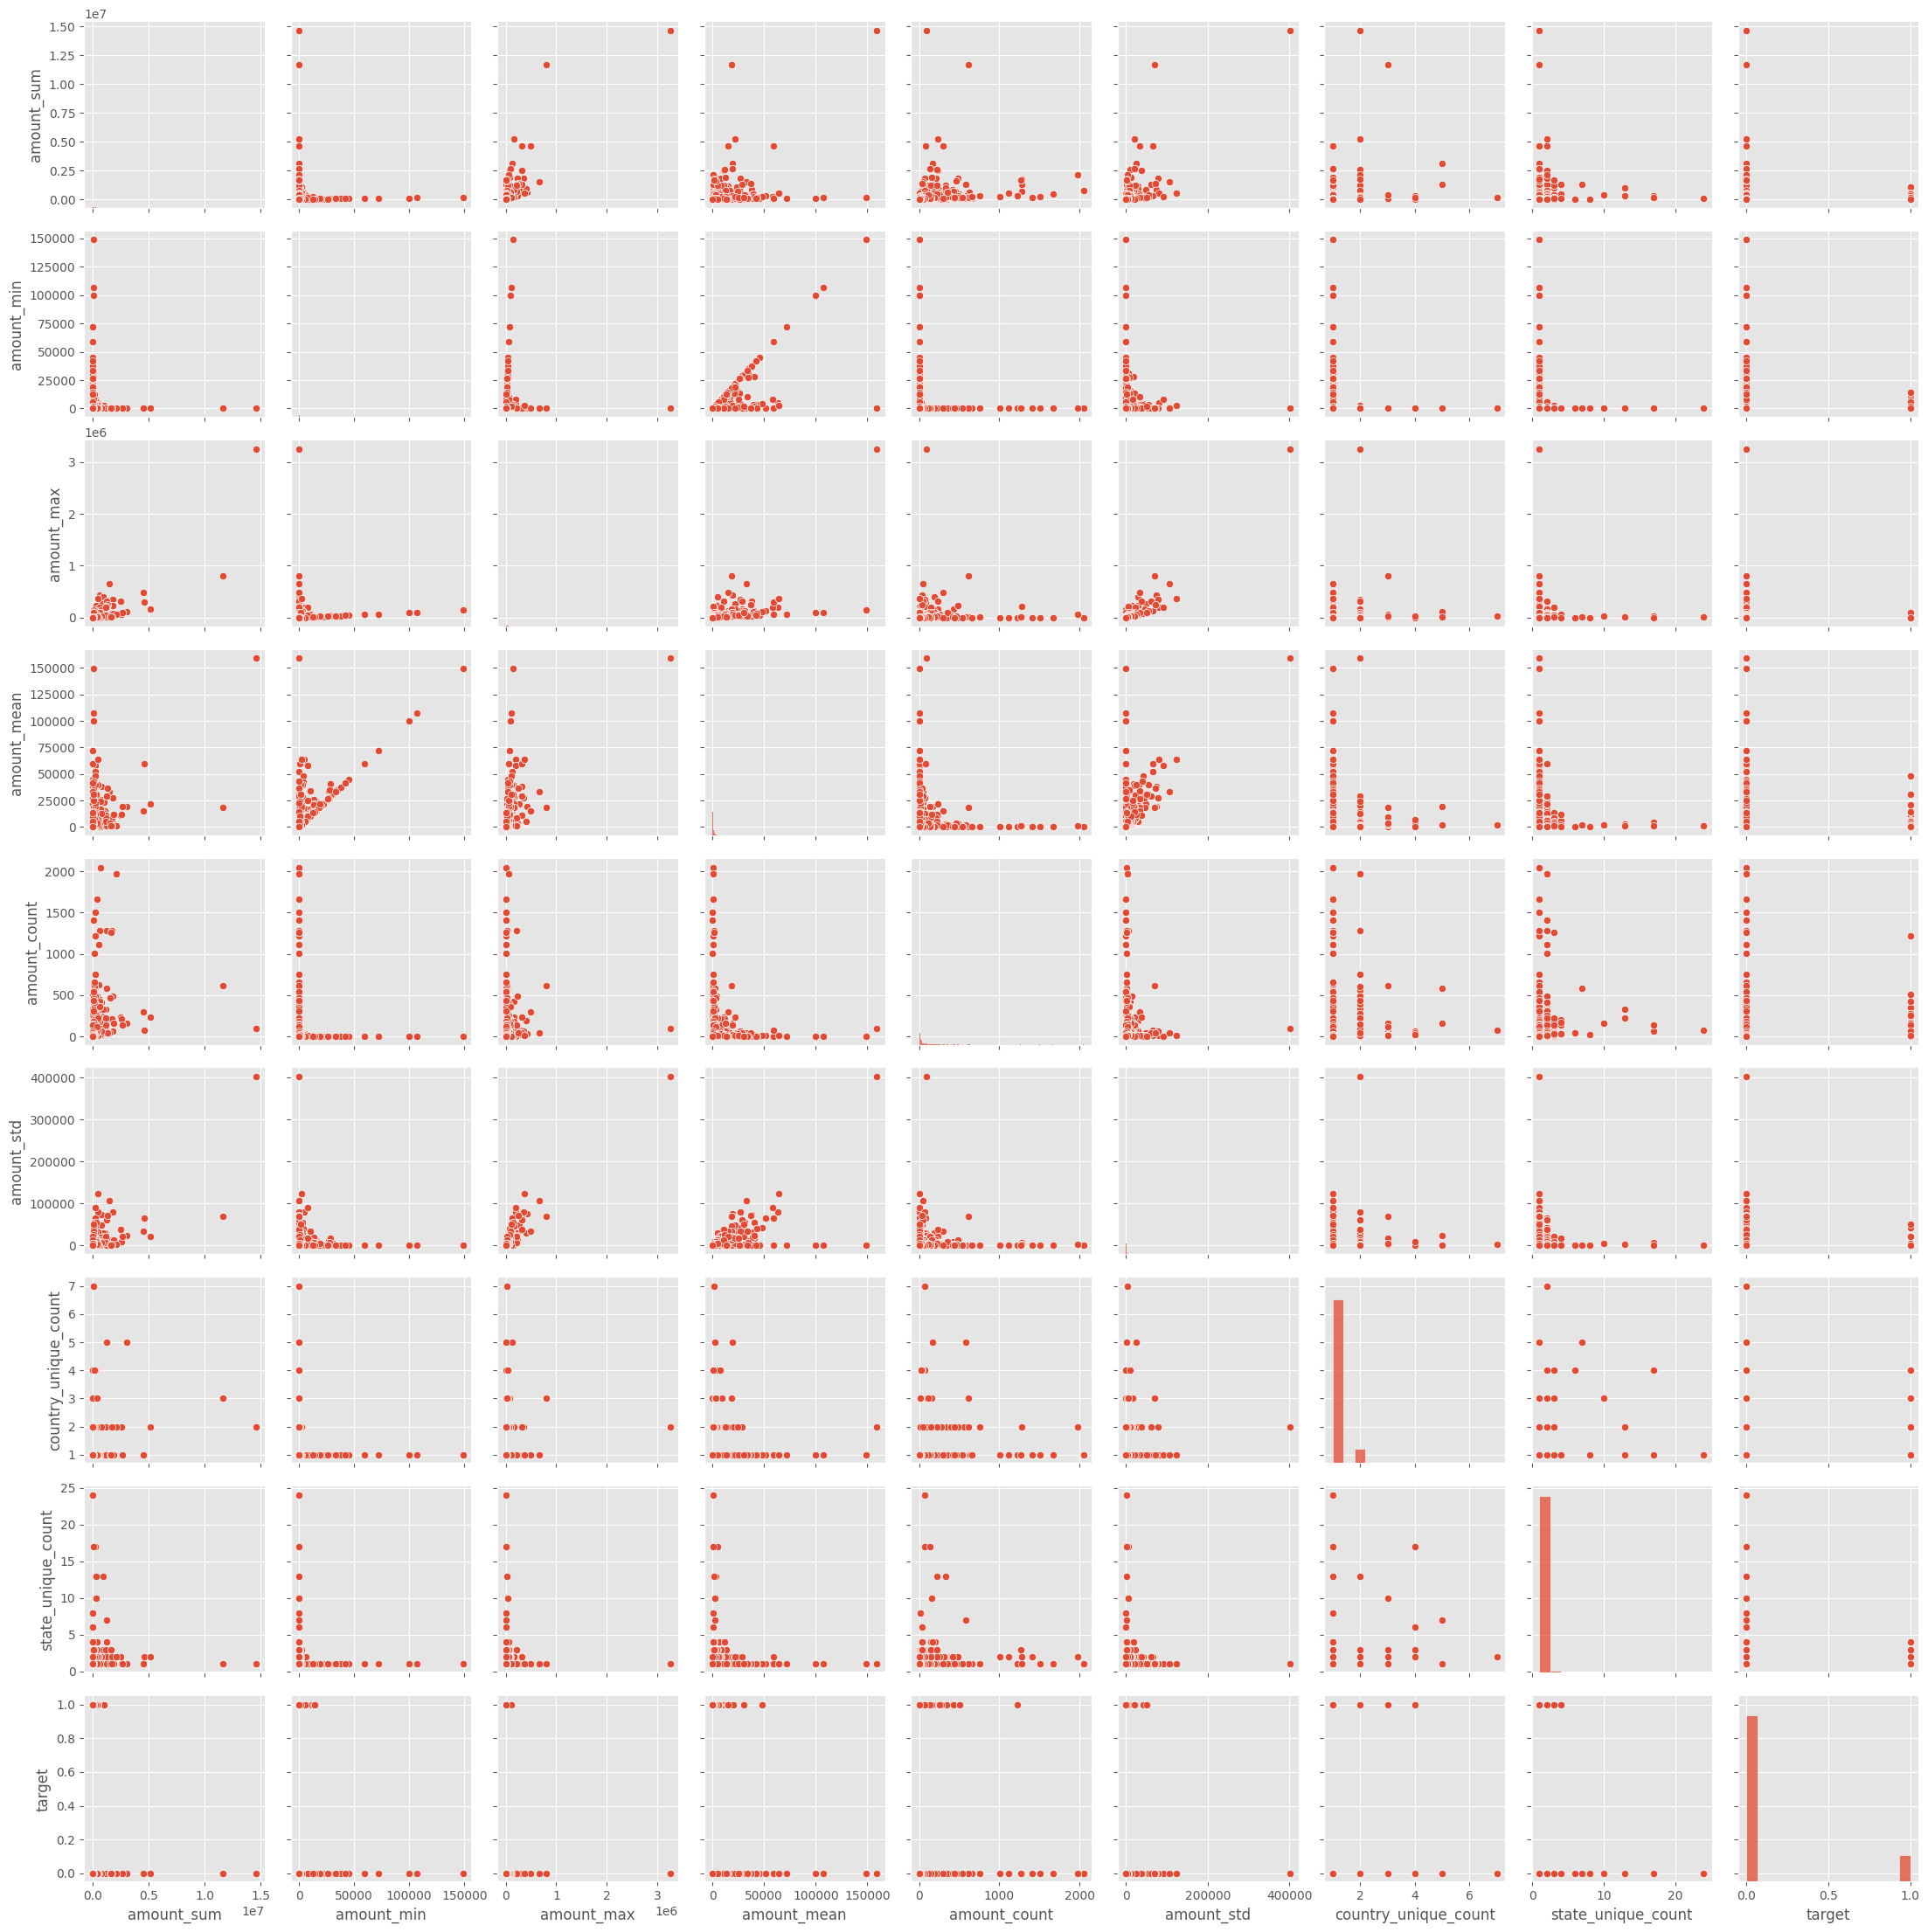

In [35]:
sns.pairplot(merged_df[agg_payout_cols])
plt.show()

/Users/rodrigogonzalez/workspace/transaction-risk-profiler/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


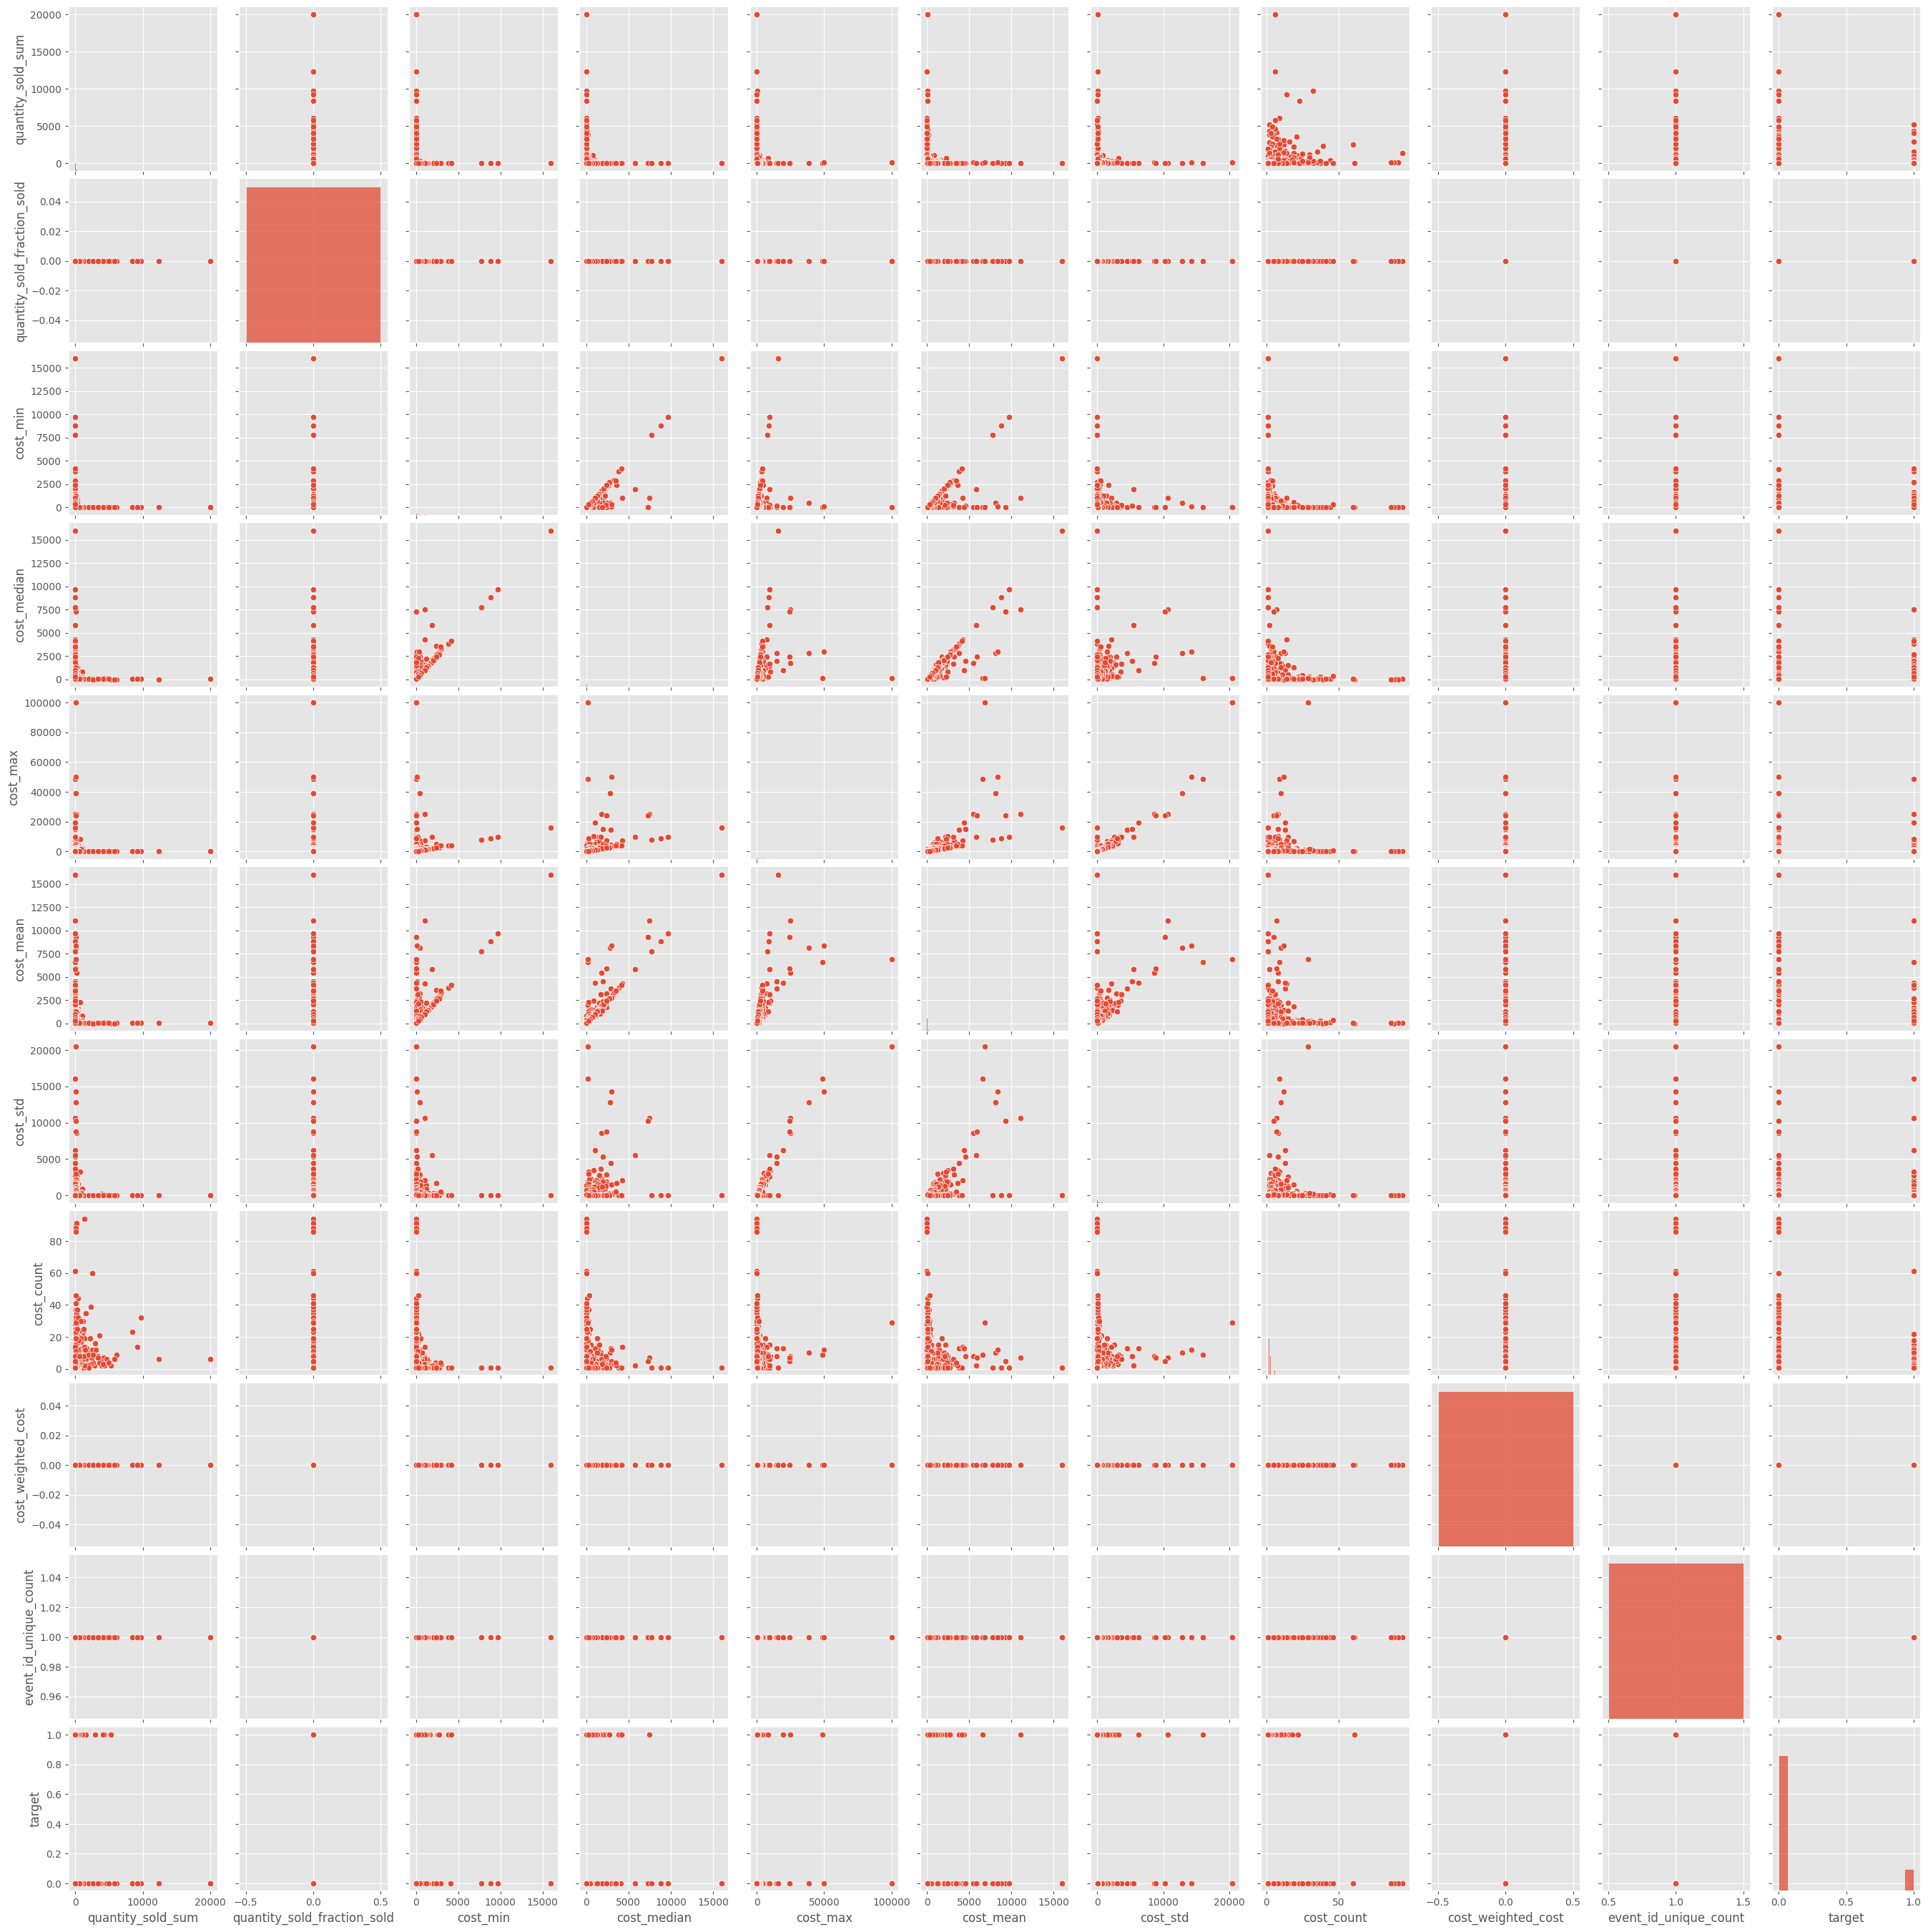

In [36]:
sns.pairplot(merged_df[agg_ticket_cols])
plt.show()